In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


### –ó–∞–¥–∞–Ω–∏–µ:

*  –≤–∑—è—Ç—å –ª—é–±–æ–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (–º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å –æ–¥–∏–Ω –∏–∑ –º–æ–¥–µ–ª—å–Ω—ã—Ö —Å https://archive.ics.uci.edu/ml/datasets.php)
*  —Å–¥–µ–ª–∞—Ç—å –æ–±–∑–æ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
*  —Å–¥–µ–ª–∞—Ç—å feature engineering
*  –æ–±—É—á–∏—Ç—å –ª—é–±–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä (–∫–∞–∫–æ–π –≤–∞–º –Ω—Ä–∞–≤–∏—Ç—Å—è)
*  —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å SHAP –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è:
    - –≤—Å–µ–≥–æ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö (summary_plot - –¥–∞—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é)
    - –¥–ª—è —Ç–æ–ø 10%
*  –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤—ã–≤–µ—Å—Ç–∏ force_plot –∏ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –ø—Ä–æ–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç


In [2]:
import pandas as pd
import numpy as np

import shap
shap.initjs()

from IPython.core.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### –ü—Ä–æ–≤–µ–¥–µ–º EDA

In [4]:
# –ò—Å—Å–ª–µ–¥—É–µ–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
df.duplicated().sum()

240

In [5]:
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã: 

df.drop_duplicates(inplace=True)

In [6]:
# –ò—Å—Å–ª–µ–¥—É–µ–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤:

df.isna().sum().sum()

0

In [7]:
df.shape

(1359, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

**–ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —è–≤–ª—è—é—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º–∏, –ø—Ä–∏ —Ç–æ–º —á—Ç–æ —Ü–µ–ª–µ–≤–æ–π (quality) –ø–æ—Ä—è–¥–∫–æ–≤—ã–π.**

**–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:**


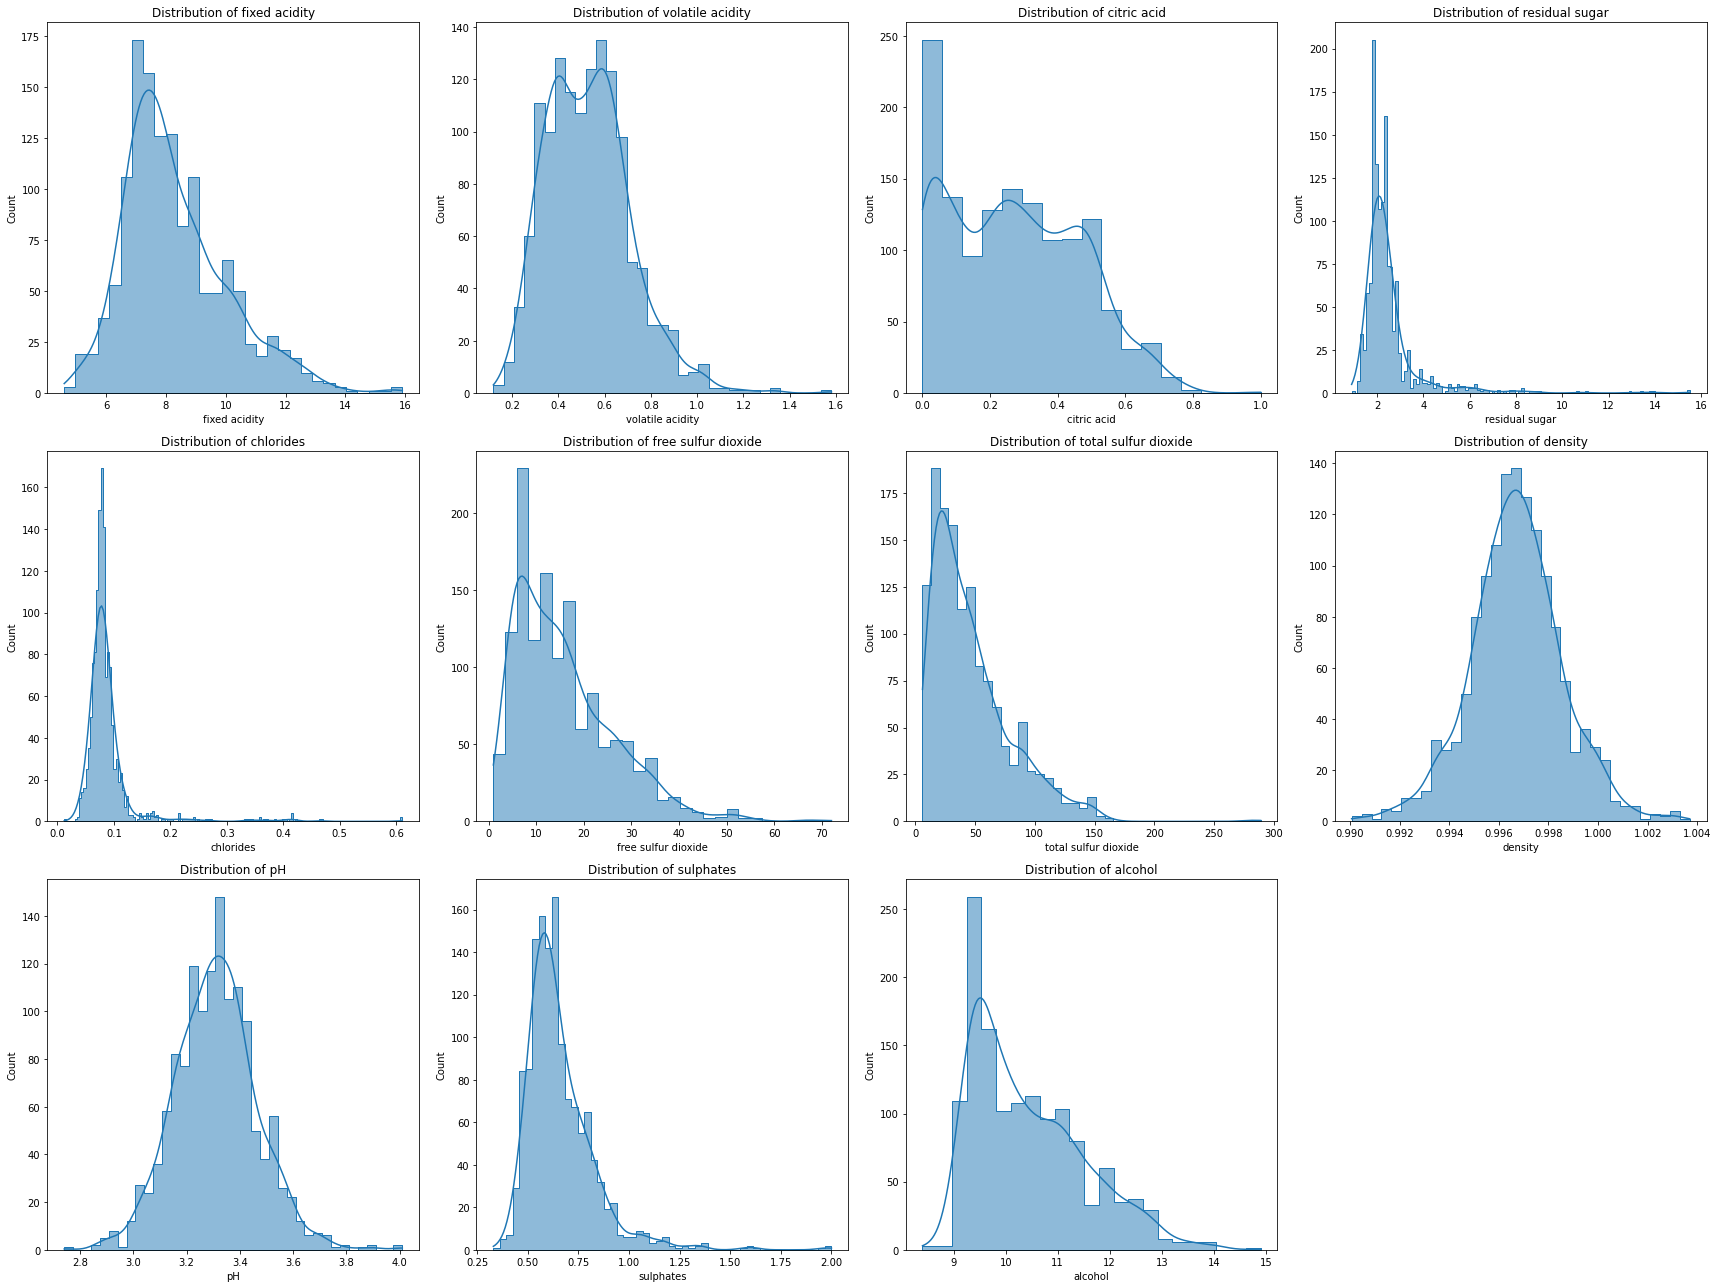

In [12]:
feature_cols=df.columns[:-1].to_numpy()
plt.figure(figsize=(24, 18))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=df, x=col, kde=True, element='step')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞:**

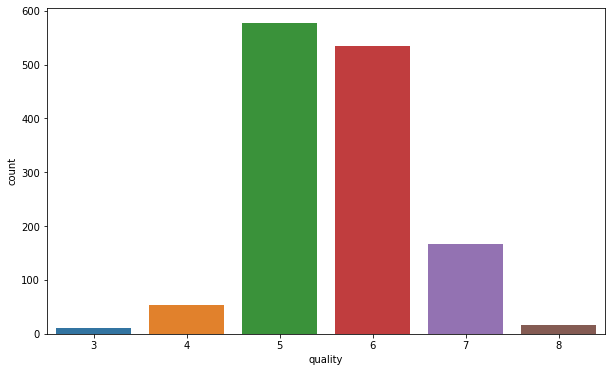

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df);

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

In [15]:
X.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [16]:
y.head(5).to_frame()

quality
0        5
1        5
2        5
3        6
5        5

In [17]:
estimator = RandomForestClassifier()
feature_selector = RFECV(estimator=estimator, min_features_to_select=1, step=1)
X_ = feature_selector.fit_transform(X.values, y);

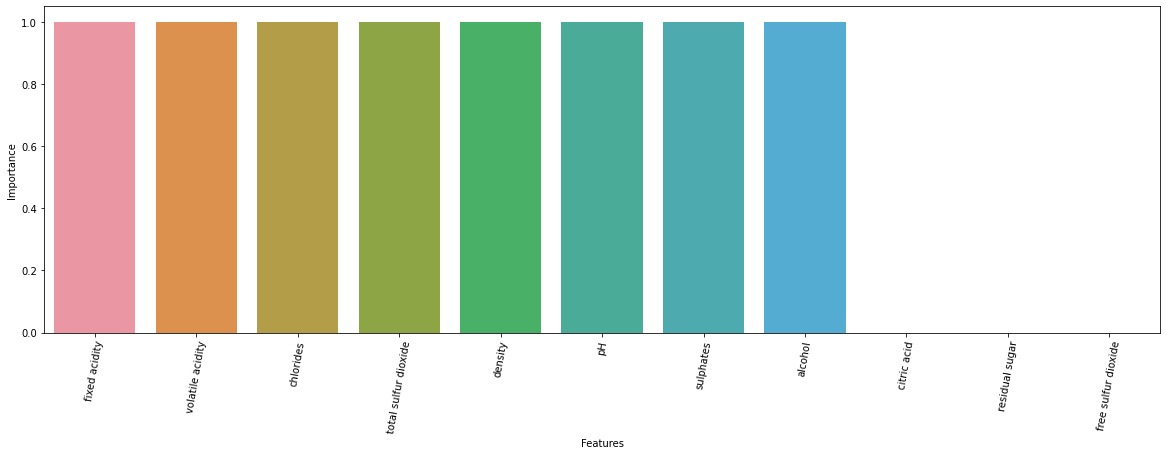

In [18]:
plot_df = pd.DataFrame({'Features': feature_cols,'Importance': feature_selector.support_.astype('int')}).sort_values('Importance', ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(x='Features', y='Importance', data=plot_df);
plt.xticks(rotation=80);

**–ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ª–µ–∑–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: volatile acidity, total sulfur dioxide, density, sulphates, alcohol.**

In [19]:
important_columns = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']
df = df[important_columns]
inputs  = df.drop(columns=['quality'])
outputs = df['quality']
inputs.shape, outputs.shape

((1359, 5), (1359,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25, random_state=41)

In [21]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train);

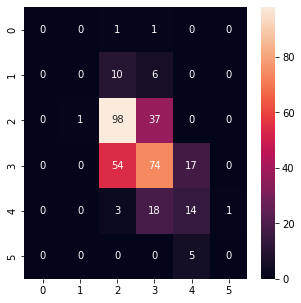

In [22]:
pred = rfc.predict(x_test)
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='.3g');

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.59      0.72      0.65       136
           6       0.54      0.51      0.53       145
           7       0.39      0.39      0.39        36
           8       0.00      0.00      0.00         5

    accuracy                           0.55       340
   macro avg       0.25      0.27      0.26       340
weighted avg       0.51      0.55      0.53       340



In [24]:
print(f'Accuracy Score = {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy Score = 54.71%


In [25]:
print(f'F1 Score = {round(f1_score(y_test, pred, average="weighted") * 100, 2)}%')

F1 Score = 52.54%


In [26]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)

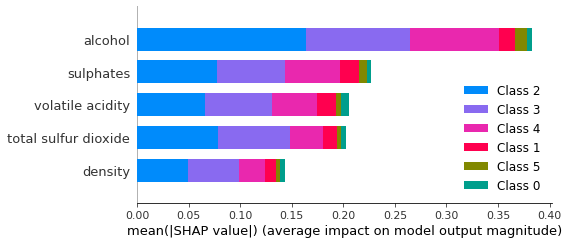

In [27]:
shap.summary_plot(shap_values, x_train)

**–ù–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –æ–∫–∞–∑–∞–ª—Å—è: alcohol. (üòÇüòÇüòÇ –∫—Ç–æ –±—ã –º–æ–≥ –ø–æ–¥—É–º–∞—Ç—å)**

**–ü—Ä–∏–∑–Ω–∞–∫–∏ total sulfur dioxide –∏ violatile acidity –∏–º–µ—é—Ç –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π –≤–µ—Å, —Ç–∞–∫–∂–µ –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ total sulfur dioxide —Å–∏–ª—å–Ω–µ–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–ø–∞–¥–∞–Ω–∏–µ –≤–æ 2 –∫–ª–∞—Å—Å —Ç–∞–∫ –∫–∞–∫ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, —á–µ–º violatile acidity, –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç, –ø—Ä–∏–∑–Ω–∞–∫ violatile acidity —Å–∏–ª—å–Ω–µ–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–ø–∞–¥–∞–Ω–∏–µ –≤ 4 –∫–ª–∞—Å—Å, —á–µ–º total sulfur dioxide.**

In [28]:
def f_plot(cl):
    return shap.force_plot(explainer.expected_value[cl], shap_values[cl], x_train)

In [29]:
f_plot(0)

In [30]:
f_plot(1)

In [31]:
f_plot(2)

In [32]:
f_plot(3)

In [33]:
f_plot(4)

In [34]:
f_plot(5)